In [2]:
import numpy as np
import pandas as pd


In [3]:
dataset = pd.read_csv("data (1).csv")

In [4]:
#required data cleaning
dataset['mass_air_flow_rate'].fillna(0,inplace=True)

C:\Users\MMC\AppData\Local\Temp\ipykernel_16452\3998760574.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['mass_air_flow_rate'].fillna(0,inplace=True)


In [5]:
#distance in km
dataset['distance']=(dataset['vehicle_speed']*2)/1000 #there is a time difference of 2s between each row

In [6]:
#mass air flow rate=air flow mass/time MAFR is in g/s so we got fuel consumed in g then we converted to kg
dataset['fuel_consumed_per_slot']=(dataset['mass_air_flow_rate']*2)/1000

In [7]:
from datetime import datetime



# Prompt user for start and end dates in 'YYYY-MM-DD' format
start_date_str = input("Enter the start date (YYYY-MM-DD): ")
end_date_str = input("Enter the end date (YYYY-MM-DD): ")

# Convert input strings to date objects (without time)
start_date = datetime.strptime(start_date_str, '%Y-%m-%d').date()
end_date = datetime.strptime(end_date_str, '%Y-%m-%d').date()

# Ensure 'time_stamp' is a datetime type
dataset['time_stamp'] = pd.to_datetime(dataset['time_stamp'])

# Filter dataset based on date only
filtered_data = dataset[(dataset['time_stamp'].dt.date >= start_date) & 
                        (dataset['time_stamp'].dt.date <= end_date)].copy()

# Check if the filtered data is empty
if not filtered_data.empty:
    # Find the first and last timestamps within the filtered data
    start_timestamp = filtered_data['time_stamp'].iloc[0]
    end_timestamp = filtered_data['time_stamp'].iloc[-1]
    
    # Calculate total time in seconds
    total_time = (end_timestamp - start_timestamp).total_seconds()
    time_in_hr=total_time/3600
    
    # Calculate total distance and average speed
    total_distance = filtered_data['distance'].sum()
    avg_speed = total_distance / time_in_hr if time_in_hr > 0 else 0

    #find max speed
    max_speed=(filtered_data["vehicle_speed"].max()*3.6)


    #fuel consumptiom
    total_fuel_consumed=filtered_data['fuel_consumed_per_slot'].sum()

    #coolant temp
    avg_cool_temp=filtered_data['engine_coolant_temperature'].mean()

    #mileage=distance/fuel_consumed
    mileage=total_distance/total_fuel_consumed
     
    
    # Print results
    print("Start Timestamp:", start_timestamp)
    print("End Timestamp:", end_timestamp)
    print("Total time in hr",time_in_hr)
    print("Total Distance in km:", total_distance)
    print("Average Speed in km/h:", avg_speed)
    print("Maximum Speed in km/h",max_speed)
    print("Total Fuel Consumed in kg or L: ", total_fuel_consumed)
    print("Engine coolant temperature in deg C: ", avg_cool_temp)
    print("Mileage in km/L: ",mileage)
else:
    print("No data found for the specified date range.")


Start Timestamp: 2024-08-31 19:48:08
End Timestamp: 2024-09-03 21:22:36
Total time in hr 73.57444444444444
Total Distance in km: 166.226
Average Speed in km/h: 2.259289910445958
Maximum Speed in km/h 241.20000000000002
Total Fuel Consumed in kg or L:  51.40222
Engine coolant temperature in deg C:  80.64564812900558
Mileage in km/L:  3.2338292003730578


In [8]:
filtered_data

,bulk_id,car_reg_no,vehicle_speed,heading,distance,altitude,o_s1_b1_voltage,o_s2_b2_voltage,o_s1_current,calculated_engine_load,...,absolute_barometric_pressure,engine_coolant_temperature,intake_air_temperature,catalyst_temperature_b1_s1,catalyst_temperature_b1_s2,ambient_air_temperature,time_stamp,latitude,longitude,fuel_consumed_per_slot
0,37121076,113,0.0,0.0,0.000,0.0,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,2024-08-31 19:48:08,0.000000,0.000000,0.00000
1,37121077,113,0.0,0.0,0.000,0.0,NaN,0.015,0.0,51.7647,...,NaN,0.0,0.0,0.0,0.0,0.0,2024-08-31 19:48:10,0.000000,0.000000,0.00000
2,37121078,113,0.0,0.0,0.000,0.0,NaN,0.015,0.0,51.7647,...,99.0,0.0,0.0,0.0,0.0,0.0,2024-08-31 19:48:12,0.000000,0.000000,0.00762
3,37121079,113,7.0,0.0,0.014,-18.4,NaN,0.015,0.0,44.7059,...,99.0,38.0,30.0,0.0,0.0,27.0,2024-08-31 19:48:14,24.910419,67.077042,0.00762
4,37121080,113,7.0,0.0,0.014,-18.4,NaN,0.015,0.0,44.7059,...,100.0,38.0,30.0,0.0,0.0,27.0,2024-08-31 19:48:16,24.910419,67.077042,0.00634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,37125917,113,0.0,0.0,0.000,0.0,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,2024-09-03 21:22:27,0.000000,0.000000,0.00000
4833,37125918,113,0.0,0.0,0.000,0.0,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,2024-09-03 21:22:29,0.000000,0.000000,0.00000
4834,37125919,113,0.0,0.0,0.000,0.0,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,2024-09-03 21:22:32,0.000000,0.000000,0.00000
4835,37125920,113,0.0,0.0,0.000,0.0,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,2024-09-03 21:22:34,0.000000,0.000000,0.00000


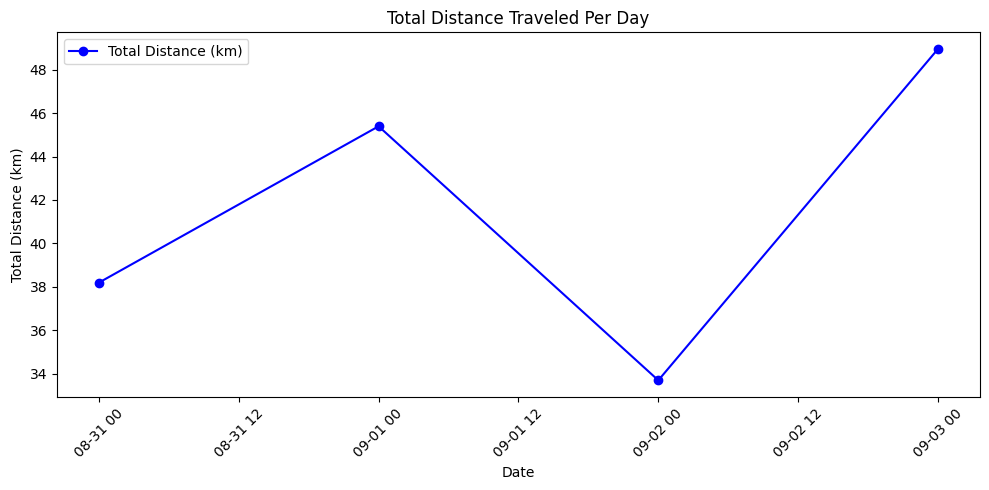

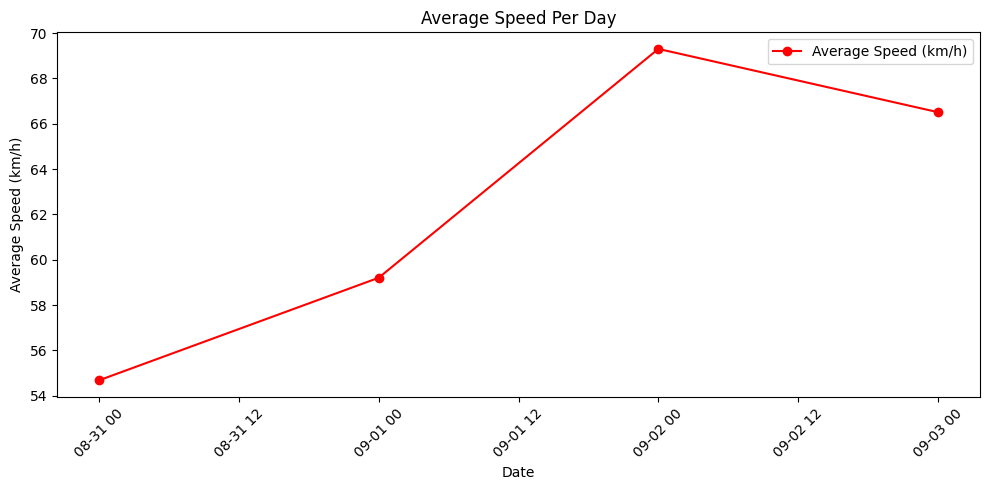

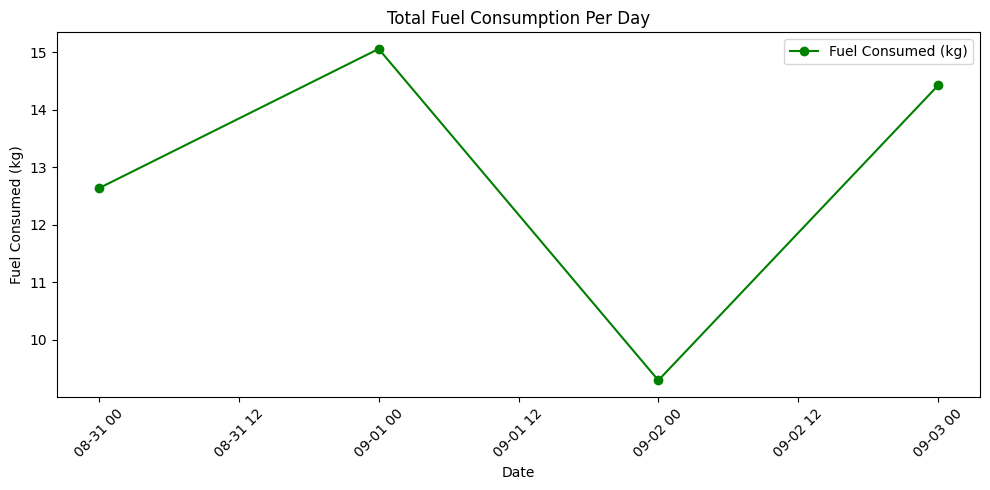

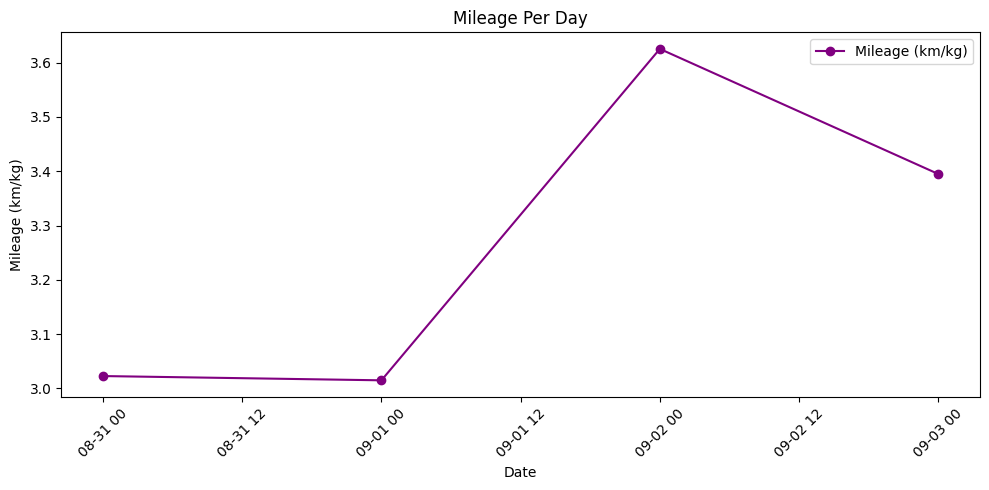

In [11]:
import matplotlib.pyplot as plt

# Check if the filtered data is empty
if not filtered_data.empty:
    # Group data by each day
    filtered_data['date'] = filtered_data['time_stamp'].dt.date
    daily_data = filtered_data.groupby('date').agg(
        total_distance=('distance', 'sum'),
        total_fuel_consumed=('fuel_consumed_per_slot', 'sum'),
        avg_speed=('vehicle_speed', lambda x: (x * 3.6).mean())  # convert m/s to km/h and average
    ).reset_index()

    daily_data['mileage'] = daily_data['total_distance'] / daily_data['total_fuel_consumed']

    # Plot total distance per day
    plt.figure(figsize=(10, 5))
    plt.plot(daily_data['date'], daily_data['total_distance'], marker='o', color='b', label='Total Distance (km)')
    plt.xlabel('Date')
    plt.ylabel('Total Distance (km)')
    plt.title('Total Distance Traveled Per Day')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot average speed per day
    plt.figure(figsize=(10, 5))
    plt.plot(daily_data['date'], daily_data['avg_speed'], marker='o', color='r', label='Average Speed (km/h)')
    plt.xlabel('Date')
    plt.ylabel('Average Speed (km/h)')
    plt.title('Average Speed Per Day')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

 # fuel consumption
    plt.figure(figsize=(10, 5))
    plt.plot(daily_data['date'], daily_data['total_fuel_consumed'], marker='o', color='g', label='Fuel Consumed (kg)')
    plt.xlabel('Date')
    plt.ylabel('Fuel Consumed (kg)')
    plt.title('Total Fuel Consumption Per Day')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot mileage per day
    plt.figure(figsize=(10, 5))
    plt.plot(daily_data['date'], daily_data['mileage'], marker='o', color='purple', label='Mileage (km/kg)')
    plt.xlabel('Date')
    plt.ylabel('Mileage (km/kg)')
    plt.title('Mileage Per Day')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Ensure the 'time_stamp' column is datetime type
dataset['time_stamp'] = pd.to_datetime(dataset['time_stamp'])

# Extract the month and year for grouping
dataset['month'] = dataset['time_stamp'].dt.to_period('M')

# Group by month
monthly_data = dataset.groupby('month').agg(
    total_entries=('engine_coolant_temperature', 'count'),
    count_over_95=('engine_coolant_temperature', lambda x: (x > 95).sum())
).reset_index()

# Calculate percentage
monthly_data['percentage_over_95'] = (monthly_data['count_over_95'] / monthly_data['total_entries']) * 100

# Plot the percentage for each month
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_data['month'].astype(str), monthly_data['percentage_over_95'], marker='o', color='orange', label='Percentage > 95°C')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Engine Coolant Temperatures > 95°C per Month')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print the table for reference
print(monthly_data)

